In [1]:
import pandas

DATA_PATH_TWEET = r'./annotated data/cleaned_annotated_tweets.csv'

annotated_tweets = pandas.read_csv(DATA_PATH_TWEET, header=None, names = ['tweet', 'label'])

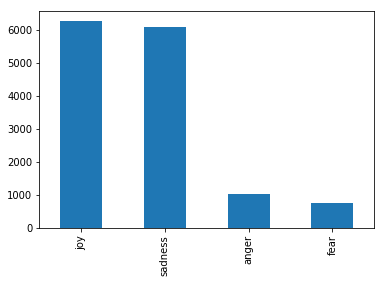

In [2]:
import matplotlib.pyplot as plt

annotated_tweets['label'].value_counts().plot(kind='bar')

plt.show()

plt.gcf().clear()

In [3]:
annotated_tweets['length'] = annotated_tweets['tweet'].apply(len)

In [4]:
print(annotated_tweets.head())

                                               tweet label  length
0  @user I will beat you !!! Always thought id be...  fear     111
1  “What worries you masters you.” - Haddon Robin...  fear     100
2  @user We are in so much trouble!! I don't thin...  fear     105
3  @user is like the big bully in class ruining e...  fear     134
4                              @user hate being shy   fear      21


In [5]:
import string

translate_table = dict((ord(char), None) for char in string.punctuation)

def remove_punctuation(str):
 return str.translate(translate_table)

annotated_tweets['tweet'] = annotated_tweets['tweet'].apply(remove_punctuation)

In [6]:
from nltk.corpus import stopwords

set_stop_words = set(stopwords.words('english'))
set_stop_words.add('user')

def remove_stop_words(str):
    return ' '.join([word for word in str.split() if word not in set_stop_words]);

annotated_tweets['tweet'] = annotated_tweets['tweet'].apply(remove_stop_words)

print(annotated_tweets['tweet'] .head())

0    I beat Always thought id gryffindor whole new ...
1    “What worries masters you” Haddon Robinson Jes...
2    We much trouble I dont think Rev see funny sid...
3    like big bully class ruining everyones lunch i...
4                                             hate shy
Name: tweet, dtype: object


In [7]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

tokenizer = nltk.casual.TweetTokenizer(preserve_case=False, reduce_len=True)

In [8]:
tokenizer.tokenize(annotated_tweets['tweet'].iloc[4])

['hate', 'shy']

In [9]:
annotated_tweets['length'] = annotated_tweets['tweet'].apply(len)

In [10]:
print(annotated_tweets.head())

                                               tweet label  length
0  I beat Always thought id gryffindor whole new ...  fear      66
1  “What worries masters you” Haddon Robinson Jes...  fear      82
2  We much trouble I dont think Rev see funny sid...  fear      63
3  like big bully class ruining everyones lunch i...  fear      99
4                                           hate shy  fear       8


In [11]:
from collections import Counter

annotated_tweets['words_count'] = annotated_tweets['tweet'].apply(lambda x: len(x.lower().split()))

In [12]:
print(annotated_tweets.head())

                                               tweet label  length  \
0  I beat Always thought id gryffindor whole new ...  fear      66   
1  “What worries masters you” Haddon Robinson Jes...  fear      82   
2  We much trouble I dont think Rev see funny sid...  fear      63   
3  like big bully class ruining everyones lunch i...  fear      99   
4                                           hate shy  fear       8   

   words_count  
0           11  
1           10  
2           12  
3           16  
4            2  
